In [2]:
using Plots 

In [64]:
#Input data
x = Float32.([0 2 -1;-2 4 -1;4 1 -1;1 6 -1;2 4 -1;6 2 -1]);
# Output label
y = [-1 -1 -1 1 1 1];

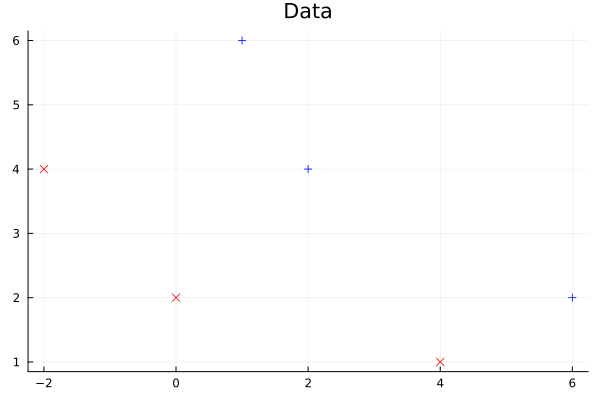

In [66]:
scatter(title="Data",legend=false);
class1 = x[(1:length(y))'[y.==-1],:];
class2 = x[(1:length(y))'[y.== 1],:];
scatter!(class1[:,1],class1[:,2],markershape=:x,c=:red)
scatter!(class2[:,1],class2[:,2],markershape=:+,c=:blue)

In [90]:
function SVM(x,y,lr=1,epoch=100000)
    w = zeros(size(x,2))
    out = []
    for e in 1:epoch
        for (i,row) in enumerate(eachrow(x))
            val = row' * w
            if y[i] * val < 1
                w = w .+ lr * ((y[i] * row) .- (2*(1/epoch)*w))
            else
                w = w .+ lr * (-2*(1/epoch)*w)
            end
        end
    end
    for (i,row) in enumerate(eachrow(x))
        append!(out,row' * w)
    end
    return w,out
end

SVM (generic function with 3 methods)

In [91]:
w,out = SVM(x,y)

([1.4763678246298102, 2.4622410537779644, 10.34601145842987], Any[-5.421529350873942, -3.449782892577634, -1.9782991061326651, 5.903802688867728, 2.4556884059416078, 3.436677596904918])

In [93]:
w

3-element Vector{Float64}:
  1.4763678246298102
  2.4622410537779644
 10.34601145842987

In [150]:
x1=[w[1] w[2] -w[2] w[1]]
x2=[w[1] w[2] w[2] -w[1]]
x1x2 = [x1;x2]

2×4 Matrix{Float64}:
 1.47637  2.46224  -2.46224   1.47637
 1.47637  2.46224   2.46224  -1.47637

In [151]:
X,Y,U,V = zip(x1,x2)

zip([1.4763678246298102 2.4622410537779644 -2.4622410537779644 1.4763678246298102], [1.4763678246298102 2.4622410537779644 2.4622410537779644 -1.4763678246298102])

50-element LinRange{Float64, Int64}:
 -3.60226,-3.62674,-3.65121,-3.67569,…,-4.72805,-4.75252,-4.777,-4.80147

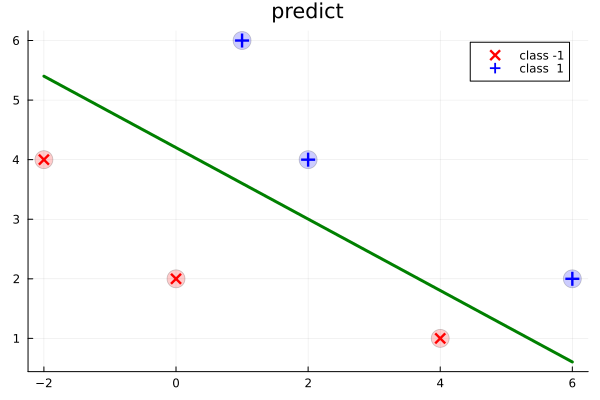

In [168]:
scatter(title="predict");
class1 = x[(1:length(y))'[y.==-1],:];
class2 = x[(1:length(y))'[y.== 1],:];
scatter!(class1[:,1],class1[:,2],markershape=:x,c=:red,markersize=5,markerstrokewidth=3,label="class -1")
scatter!(class2[:,1],class2[:,2],markershape=:+,c=:blue,markersize=7,markerstrokewidth=3,label="class  1")
color_filter = a -> a <= 0 ? :red : :blue
color = color_filter.(out)
scatter!(x[:,1],x[:,2],c=color,markeralpha=0.2,markersize=10,label=false)
x_points = LinRange(-2,6, 50)
y_points = -(w[1] / w[2]) * x_points .+ w[3] / w[2]
plot!(x_points,y_points,c=:green,linewidth=3,label=false)


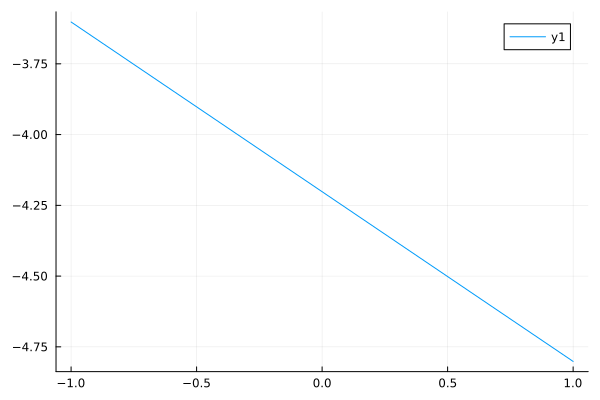